<Figure size 432x288 with 0 Axes>

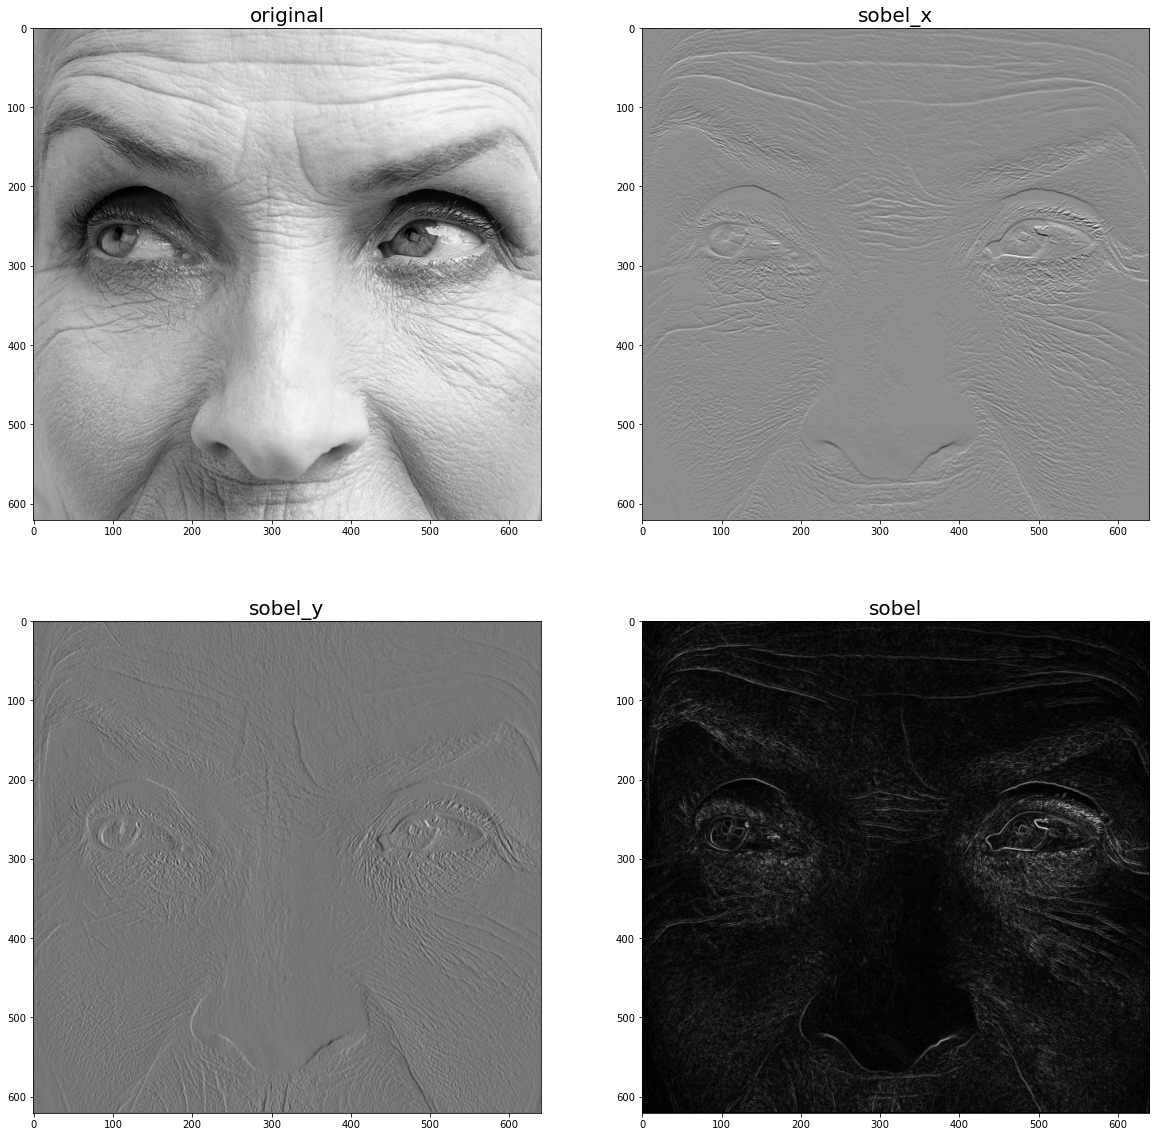

In [1]:
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters
im = rgb2gray(imread('testimg.jpeg')) # RGB image to gray scale
plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(im)
plt.title('original', size=20)
plt.subplot(222)
edges_y = filters.sobel_h(im) 
plt.imshow(edges_y)
plt.title('sobel_x', size=20)
plt.subplot(223)
edges_x = filters.sobel_v(im)
plt.imshow(edges_x)
plt.title('sobel_y', size=20)
plt.subplot(224)
edges = filters.sobel(im)
plt.imshow(edges)
plt.title('sobel', size=20)
plt.show()


<Figure size 432x288 with 0 Axes>

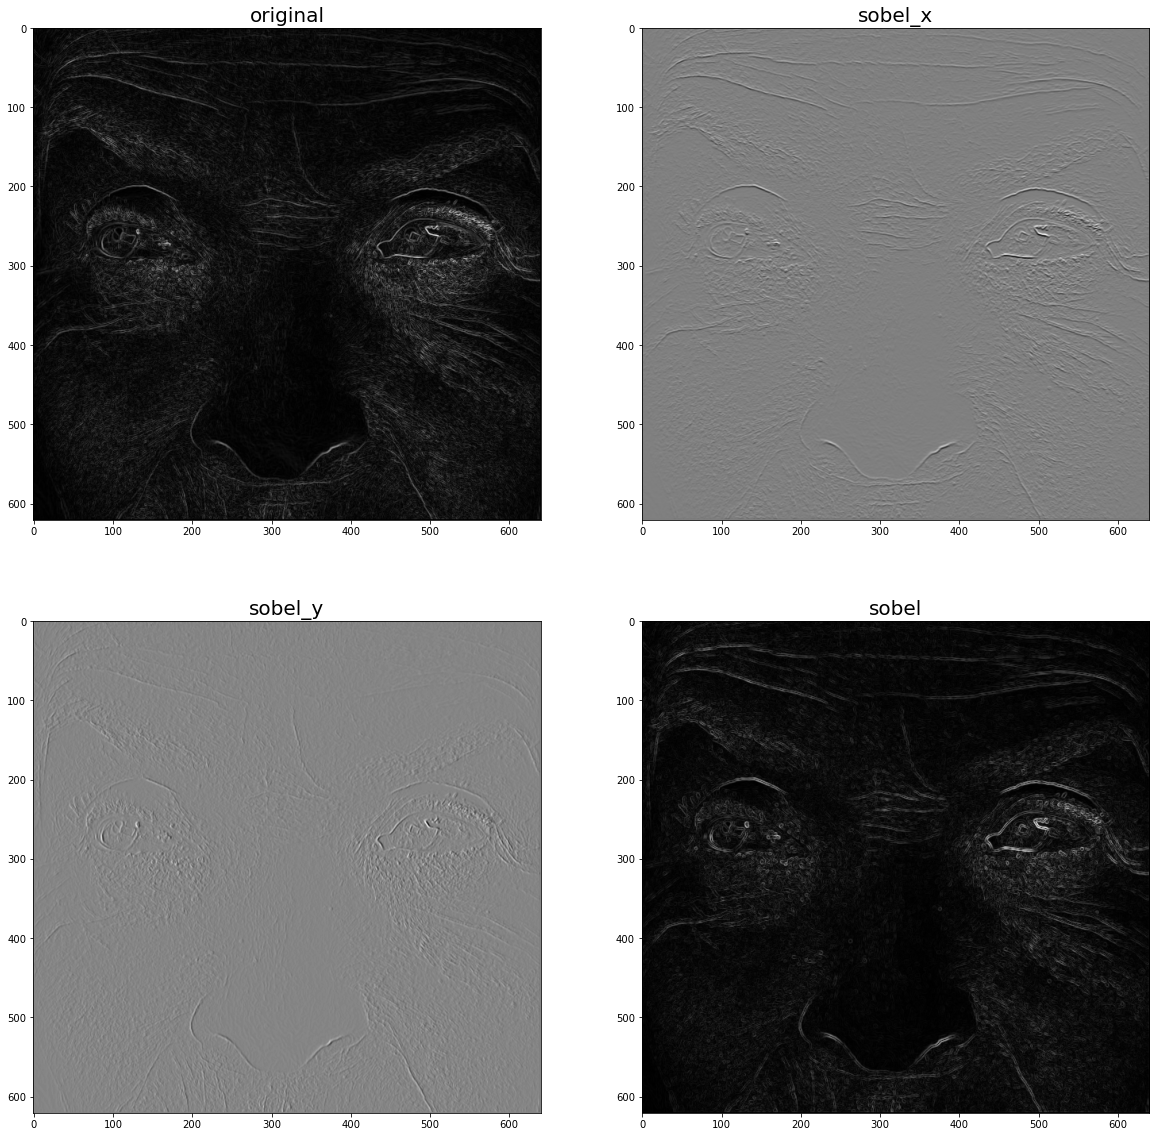

In [2]:
im = edges # RGB image to gray scale
plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(im)
plt.title('original', size=20)
plt.subplot(222)
edges_y = filters.sobel_h(im) 
plt.imshow(edges_y)
plt.title('sobel_x', size=20)
plt.subplot(223)
edges_x = filters.sobel_v(im)
plt.imshow(edges_x)
plt.title('sobel_y', size=20)
plt.subplot(224)
edges = filters.sobel(im)
plt.imshow(edges)
plt.title('sobel', size=20)
plt.show()

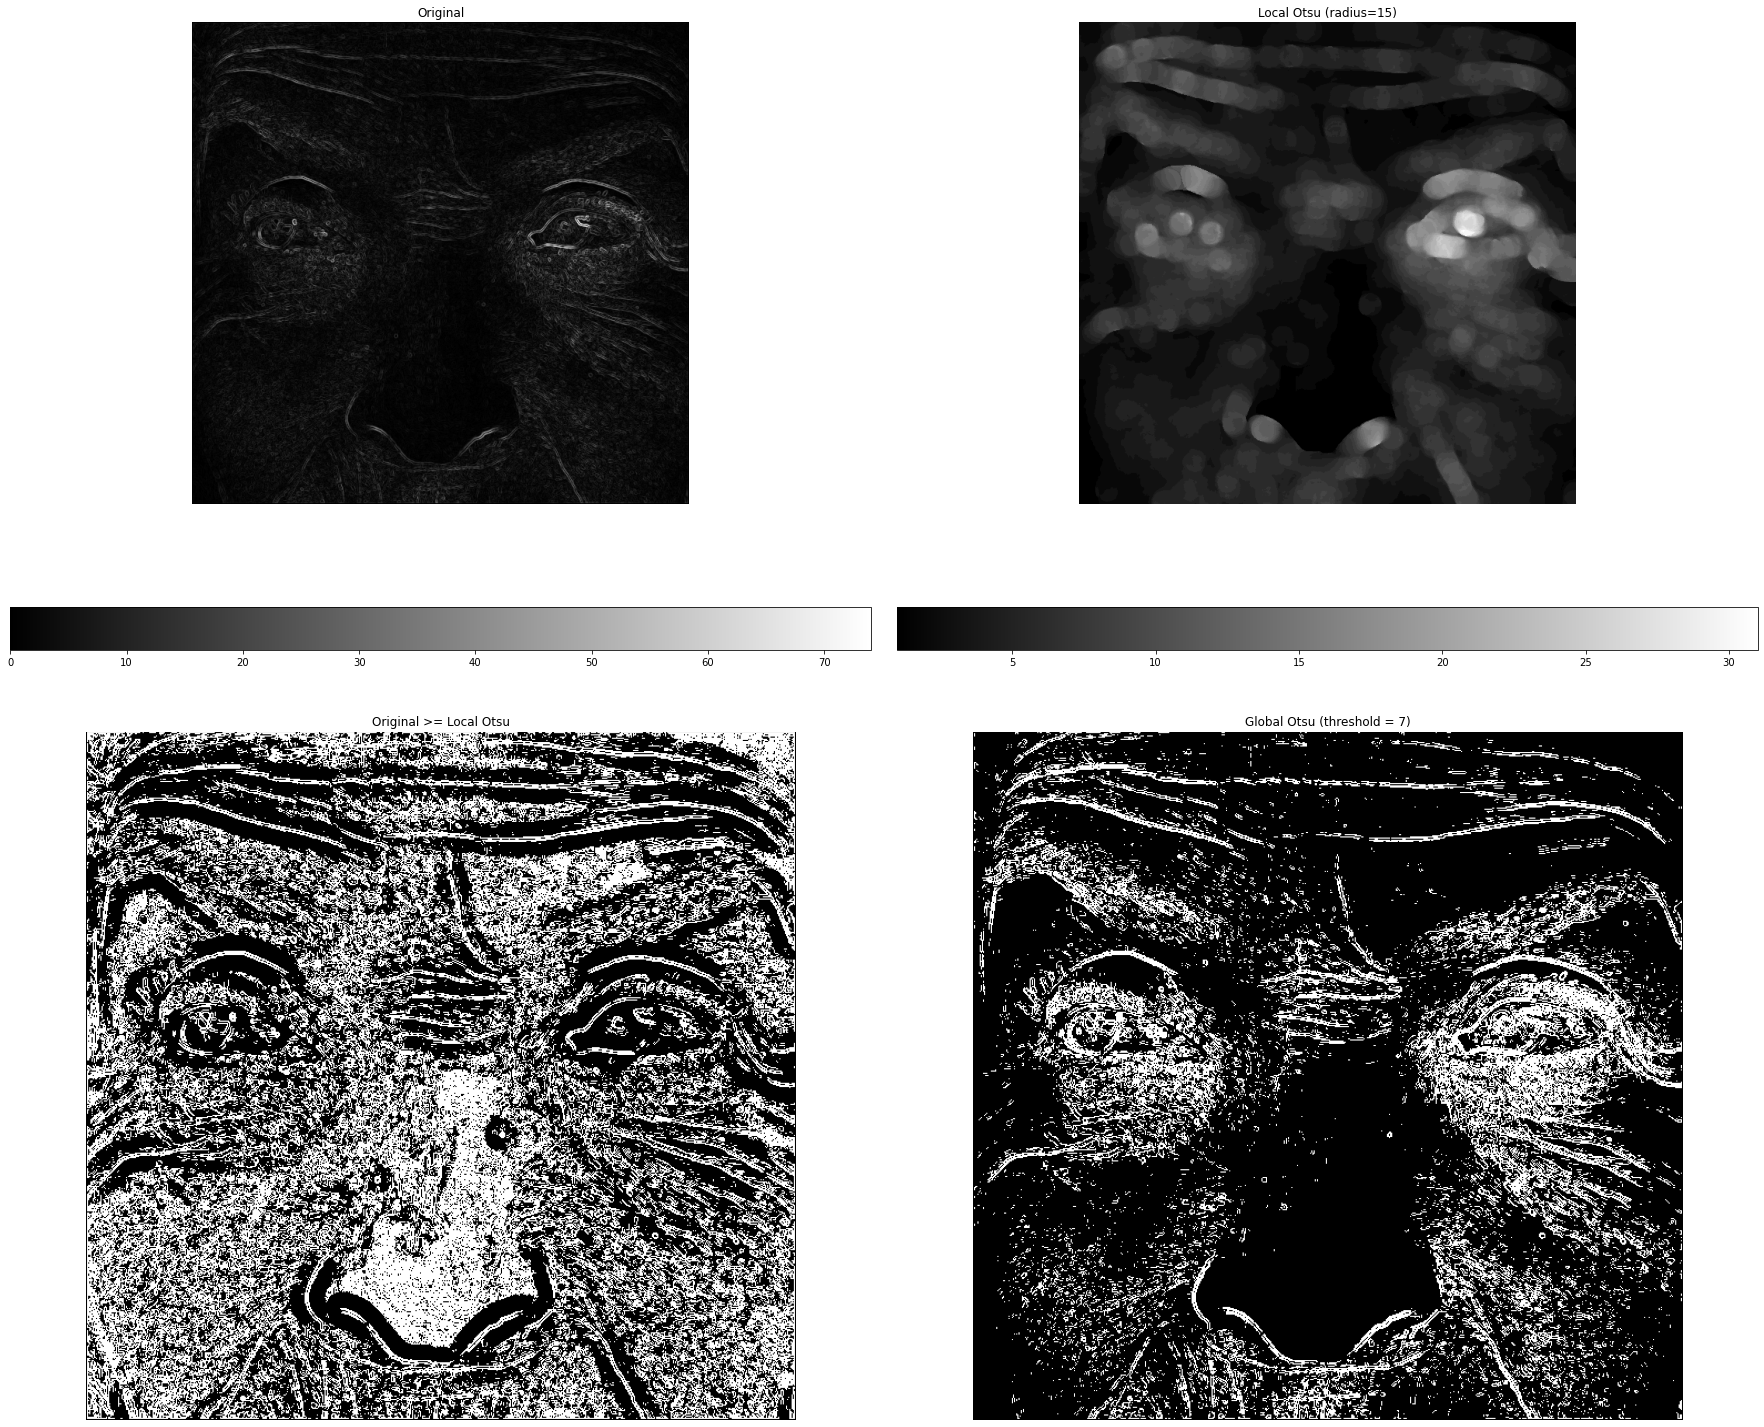

In [3]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte


img = img_as_ubyte(edges)

radius = 15
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(25, 20), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()

In [52]:
image = global_otsu
thresh = filters.threshold_isodata(image)
binary = image > thresh

In [39]:
print(thresh)

0.498046875


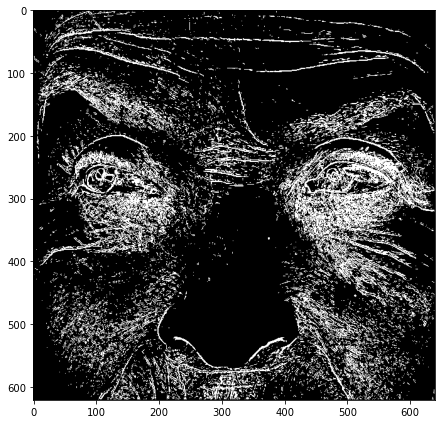

In [28]:
fig1, ax1 = plt.subplots(figsize=(9, 6))
ax1.imshow(binary)
plt.tight_layout()


In [37]:
for i in range(100):
    thresh = filters.threshold_isodata(binary)
    binary = image > thresh

In [59]:
thresh = 1
binary = image > thresh